In [1]:
import dinsar
from shapely.geometry import Point
import geopandas as gpd
import random
import pandas as pd 
import numpy as np

Doñana = dinsar.example.get_model()


Geometría añadida correctamente.
Geometría añadida correctamente.
Geometría añadida correctamente.


## Creación de una base de datos aleatoria

In [ ]:
x1, y1, x2, y2 = Doñana.get('Asc').gdf.total_bounds

random_point = lambda x1, y1, x2, y2 : Point(random.uniform(x1, x2), random.uniform(y1, y2))

# Definición de la base de datos (pandas.DataFrame):
columns, values = [i for i in 'ABCDE'], [np.random.random(60) for i in range(5)]
df_table = {i:j for i,j in zip(columns, values)}
df = pd.DataFrame(df_table, index=pd.date_range(start='2015', end='2020', freq='M'))
df = df.melt(var_name='Nombre', value_name='Valores', ignore_index=False)
df.index.name = 'Fechas'
df.reset_index(inplace=True)

# Definición de un archivo espacial
table = {'Nombre':[i for i in 'ABCDE'],
         'geometry':[random_point(x1, y1, x2, y2) for i in range(5)]}
gdf = gpd.GeoDataFrame(table, crs=25830)

gps = dinsar.DataBase(df, name='gps', units='cm', color='black')
gps.append_geometry(gdf)
Doñana.append(gps)

### Ejemplo de análisis wavelet comparativo entre la serie temporal de deformación de la estación fictia de GPS con nombre 'A' y los puntos de deformación (PS) del dataset Asc presentes en un radio de 10 km a la redonda.

#### Representación espacial de la estación 'A' y el dataset Asc

In [9]:
m = Doñana.get('gps').mapa(LayerControl=False)
Doñana.get('Asc').mapa(m=m)

#### Definición de las series temporales y cálculo de las transformaciones Wavelet.

Smoothing the time series...
Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


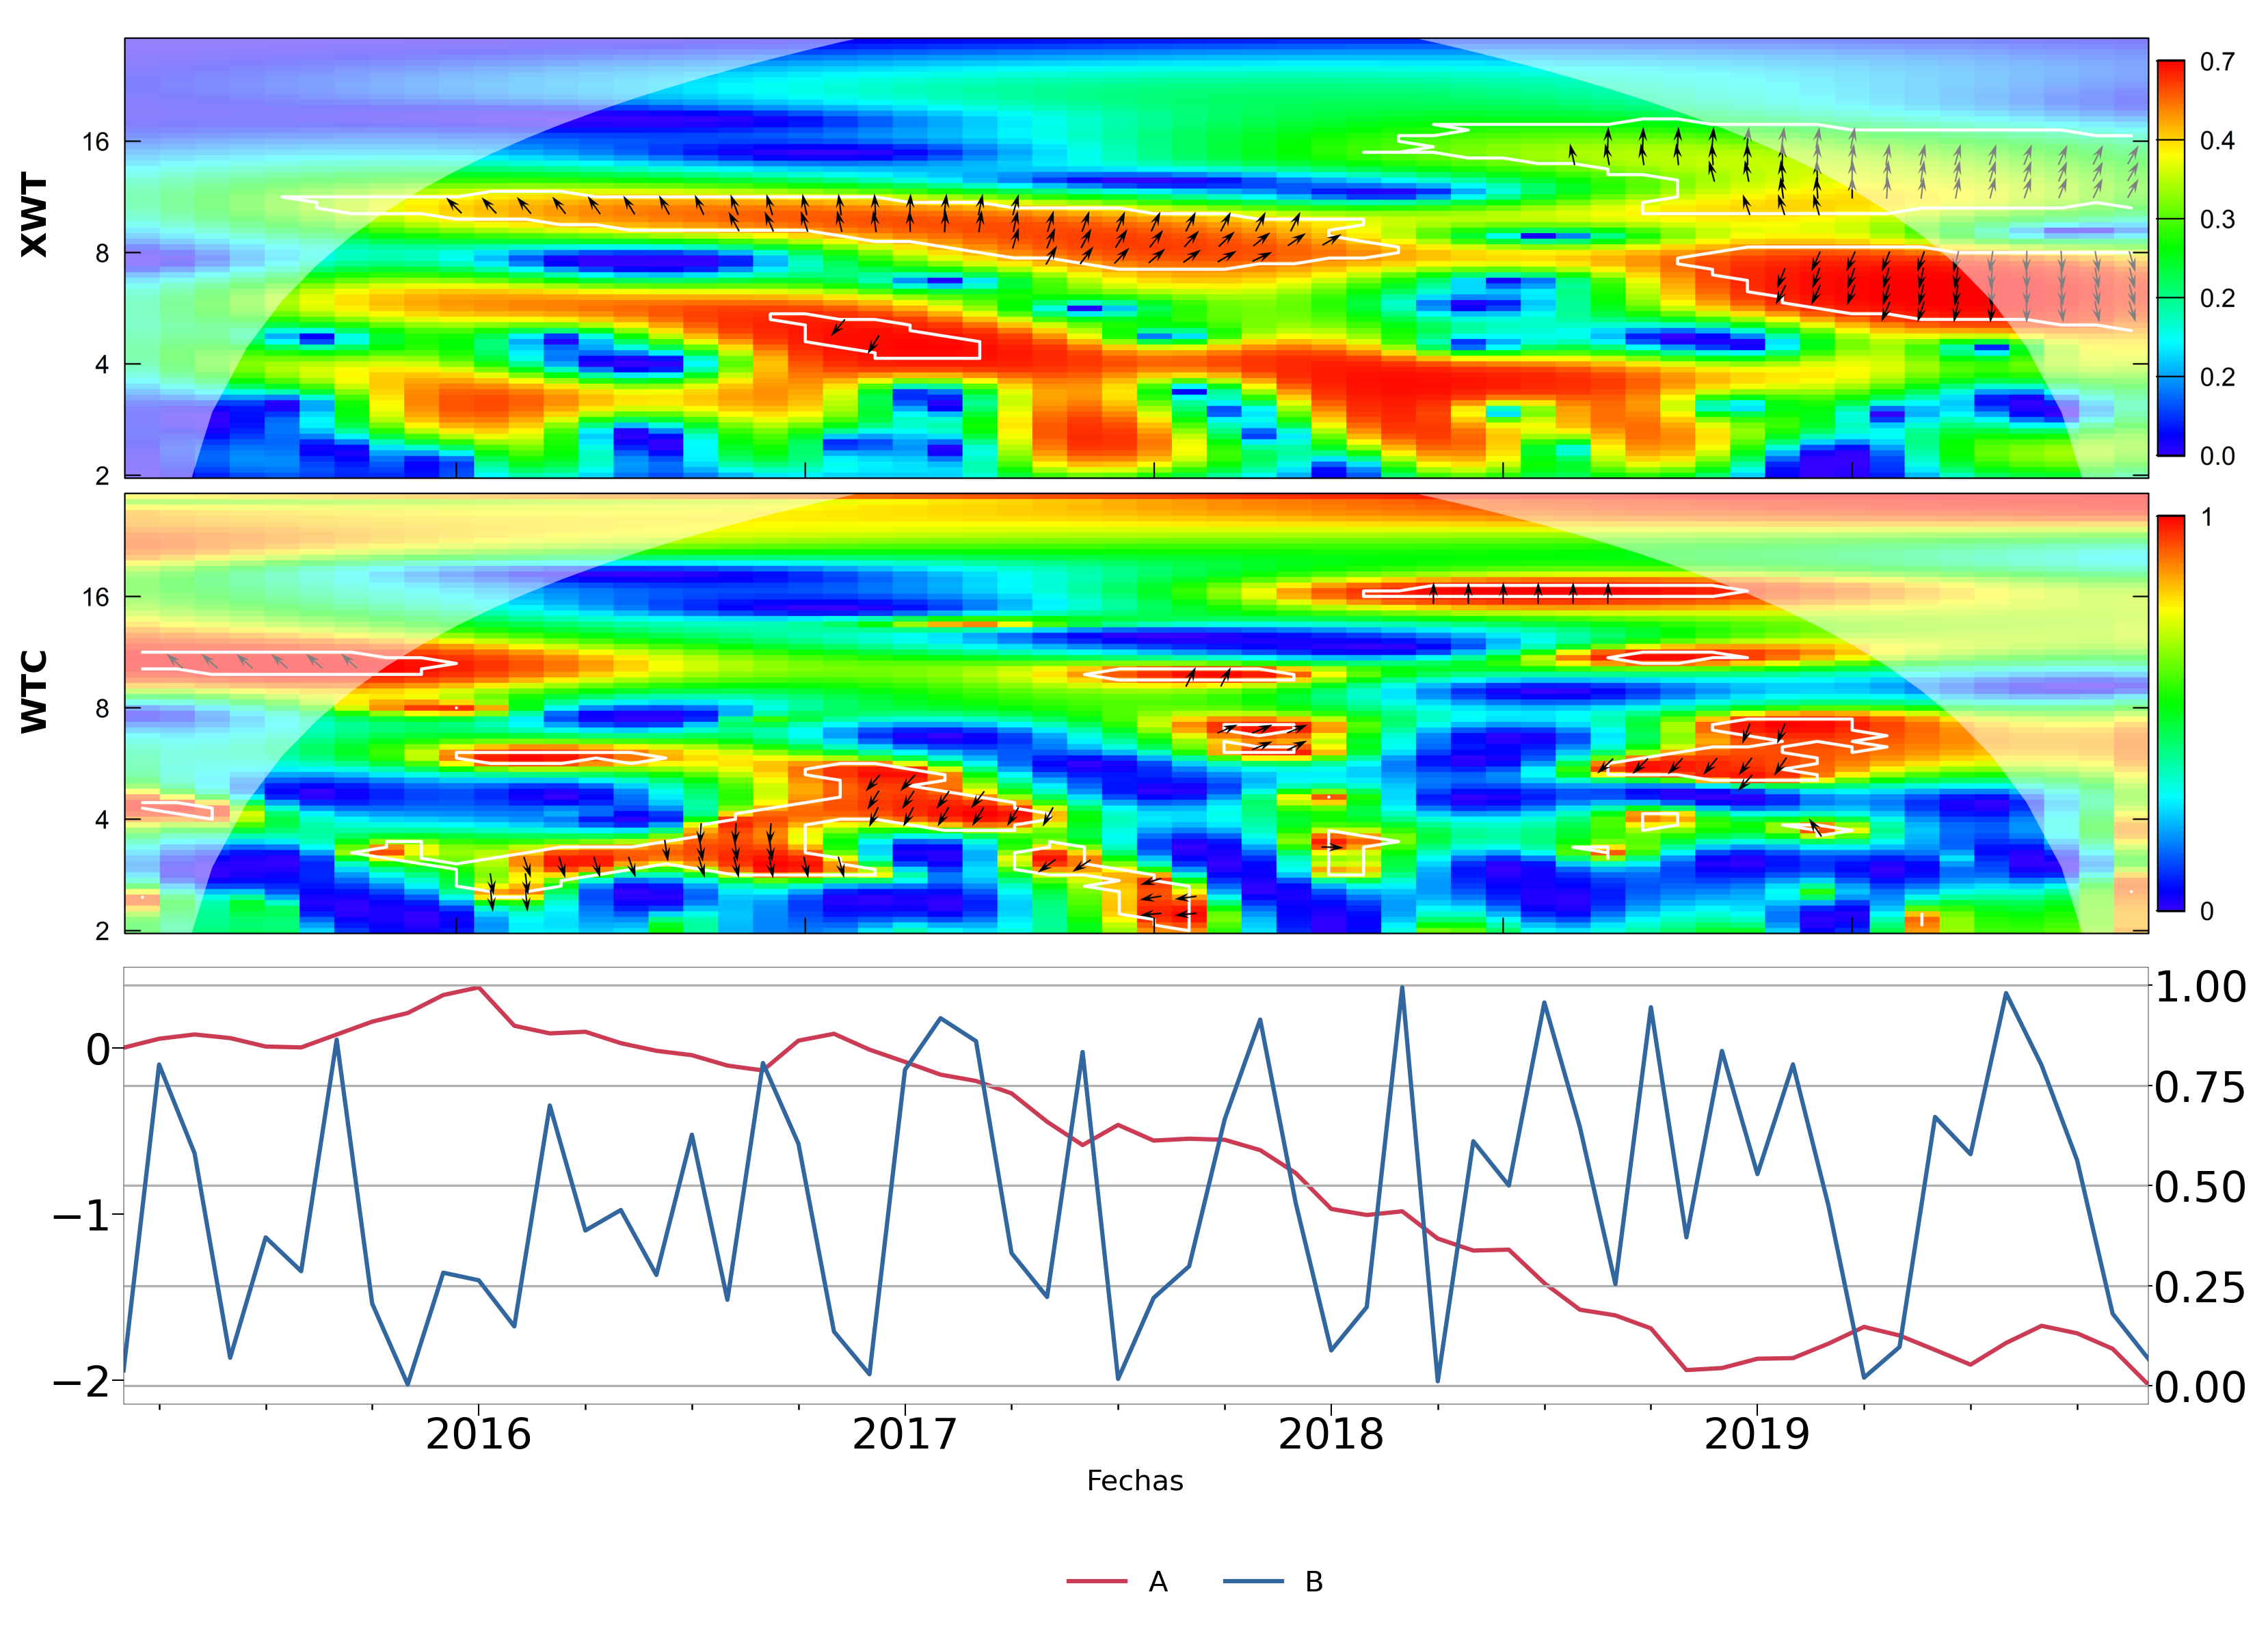

In [42]:
# Selección de los puntos y creación de un objeto Dataset para obtener el promedio únicamente de la componenente vertical.
Asc, Gps = Doñana.get('Asc'), Doñana.get('gps')
sensor_xy = Gps.xy('A')

puntos = Asc.find_element(sensor_xy, way='radius').columns
ts_defor = Asc.subset(list(puntos), vm=True).mean()

ts_gps = Gps.take('A').set_index('Fechas')
ts_gps.drop('Nombre',axis=1, inplace=True)

dinsar.Wavelet('M', ts_defor, ts_gps)